# Trabalho T3 - Aproximação de funções

### MTM 224 - Métodos Numéricos Computacionais
### Eng. Química(305) - Turma 14

*Nomes*: Gabriel Righi, **201612819**; Júlia Pesarico, **20182064**.

---
## Questão 1

Determinar o valor de $v$ para $T = 750ºF$ usando interpolação. Utilize a fórmula de Lagrange e a fórmula de Newton e compare o resultado. Comente o que você observou.

P(750) =  0.14830937500000002


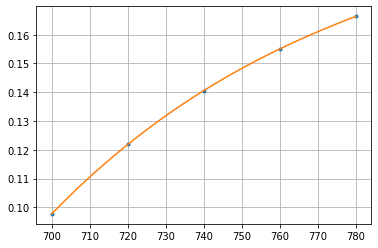

In [12]:
#Para a fórmula de Lagrange temos:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#Vetor temperatura em Farenheit
T = np.array([700., 720., 740., 760., 780.])
#Vetor v em pés cúbicos
v = np.array([0.0977, 0.12184, 0.14060, 0.15509, 0.16643])
#variável n recebe o tamanho do vetor v
n = len(v);

#define a função calculaP para encontrar o valor dos lk e
#multiplicálos aos valores de v, como define a fórmula de Lagrange
def calculaP(x):
    valor = 0
    for k in range(n-1):
        lk = 1.0
        for i in range(n-1):
            if k != i:
                lk = lk*(x - T[i])/(T[k]-T[i])
        valor = valor + v[k]*lk 
    return valor

#Cria novo vetor e Tnew define um espaço dividido igualmente em 80 partes
#no intervalo definido por T[0] e T[4]
Vnew = []
Tnew = np.linspace(T[0], T[4], num=80)
for tnew in Tnew:
    vnew = calculaP(tnew)
    Vnew = vnew

print("P(750) = ", calculaP(750))

plt.plot(T, v, '.', Tnew, calculaP(Tnew), '-')
plt.grid()
plt.show()




P(750) =  0.148308984375


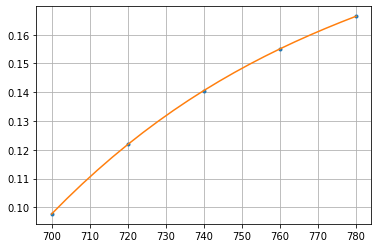

In [11]:
#Para a fórmula de Newton temos:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#Vetor temperatura em Farenheit
xi = np.array([700., 720., 740., 760., 780.])
#Vetor v em pés cúbicos
yi = np.array([0.0977, 0.12184, 0.14060, 0.15509, 0.16643])

def evalPoly(dd, xi, x):
    n = len(xi) - 1
    #Decrescimo do polinomio
    p = dd[n]
    for k in range(1, n+1):
        p = dd[n-k] + (x - xi[n-k])*p
    return p

def coeffts(xi, yi):
    m = len(xi)
    #Numero de pontos
    dd = yi.copy()
    
    for k in range(1, m):
        dd[k:m] = (dd[k:m] - dd[k-1])/(xi[k:m] - xi[k-1])
    return dd

dd = coeffts(xi,yi)
print("P(750) = ", evalPoly(dd,xi,750))

Xplot = np.linspace(xi[0], xi[-1], 21)
Yplot = []

for x in Xplot:
    Yplot.append(evalPoly(dd,xi,x))
    
plt.plot(xi, yi, ".", Xplot, Yplot, "-")
plt.grid()
plt.show()

De fato, ambos os meétodos convergem para valores muito aproximados. Porém verificando o uso de memória e processamento, o método de Newton se faz mais eficiente que o método de Lagrange

---
## Questão 2
Considerando a função $f(x) = \frac{3.21}{0.73 + 9.81x^{2}}$  
a) Aproxime o valor de $f(1.78)$ usando um polinômio de grau 3 no intervalo $[1, 2]$
e compare com o valor da função. Mostre o gráfico do polinômio e da função
nesse intervalo.  
b) Repita o item anterior, mas dessa vez utilize um polinômio de grau 10 no
intervalo $[-2,2]$ e comente o que você observou.  
c) Pesquise e responda o que é "Fenômeno de Runge".

P(1.78) = 0.10186113819231796 
f(1.78) = 0.10090530605993887 
Erro = 0.009472565613262287


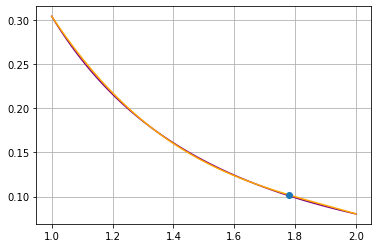

In [2]:
#Para o polinômio de grau 3 no intervalo [1,2] temos:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#Função dada pelo exercício como f(x)
f = lambda x: 3.21/(0.73  +9.81 * x**2)

#Divide em 4 espaços iguais entre os valores 1 e 2
X = np.linspace(1, 2, 4)

Y = f(X)
L = len(X)

# Calculo do valor do polinômio no ponto
def LagrangeP(x):
    resultado = 0
    for k in range(L):
        lk = 1
        for i in range(L):
            if i != k:
                lk = lk * (x - X[i]) / (X[k] - X[i])
        resultado += lk * Y[k]
    return resultado

# Calculo do erro relativo
erro = lambda x: abs(LagrangeP(x) - f(x)) / abs(f(x))

print("P(1.78) =", LagrangeP(1.78), "\nf(1.78) =", f(1.78), "\nErro =", erro(1.78))
Xplot = np.linspace(1, 2, 101)

# A função está representada na cor roxa;
# O polinômio interpolador está representado na cor laranja
# O ponto azul representa o ponto interpolado
plt.plot(Xplot, f(Xplot), "purple", Xplot, LagrangeP(Xplot), "orange", 1.78, LagrangeP(1.78), "o")
plt.grid()
plt.show()

P(1.78) = 10.598808760629598 
f(1.78) = 0.10090530605993887 
Erro = 104.03717965370214


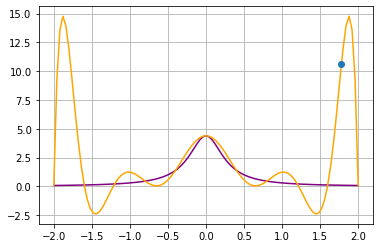

In [3]:
#Para o polinômio de grau 10 no intervalo [-2,2] temos:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#Função dada pelo exercício como f(x)
f = lambda x: 3.21/(0.73 + 9.81 * x**2)

#Divide em 11 espaços iguais entre os valores -2 e 2
X = np.linspace(-2, 2, 11)

Y = f(X)
L = len(X)

# Calculo do valor do polinômio no ponto
def LagrangeP(x):
    resultado = 0
    for k in range(L):
        lk = 1
        for i in range(L):
            if i != k:
                lk = lk * (x - X[i]) / (X[k] - X[i])
        resultado += lk * Y[k]
    return resultado

# Calculo do erro relativo
erro = lambda x: abs(LagrangeP(x) - f(x)) / abs(f(x))

print("P(1.78) =", LagrangeP(1.78), "\nf(1.78) =", f(1.78), "\nErro =", erro(1.78))

Xplot = np.linspace(-2, 2, 101)

# plot do grafico semelhante ao da alternativa a)

plt.plot(Xplot, f(Xplot), "purple", Xplot, LagrangeP(Xplot), "orange", 1.78, LagrangeP(1.78), "o")
plt.grid()
plt.show()

Como é possível verificar, a primeira questão onde foi solicitado um polinômio de grau 3, os resultados da $f(x)$ e do polinômio $P(x)$ foram muito próximos, com erro inferior a $10^{-2}$. Porém, ao aumentarmos o grau do polinômio para 10, foi possível verificar que a aproximação se tornava menos exata quanto mais nos aproximávamos dos valores próximos ao intervalo especificado. Vale destacar que diferente da alternativa *a)* onde o erro foi pequeno, na alternativa *b)* o erro foi superior a $10^{2}$ Isso é o que chamamos de *Fenômeno de Runge*.

O *Fenômeno de Runge* é um problema encontrado quando decidimos interpolar determinadas funções, ocorrendo oscilações nas bordas de um intervalo de acordo com o grau do polinômio. Por exemplo: dada a função $f(x) = \frac{1}{(1+25x^{2})}$ em um intervalo $[-1,1]$. Conforme o grau do polinômio aumenta, maior fica a distorção e consequentemente o grafico se distancia dos pontos próximos ao intervalo $[-1,1]$. No exemplo da questão, como foi demonstrado pela alternativa *b)* fica claro que quanto mais aumentarmos o grau do polinômio, menor é a precisão encontrada

---
## Questão 3

a) Use mínimos quadrados para ajustar uma reta dos dados. Mostre o resultado
gráficamente.  
b) Repita o item anterior ajustando uma parábola aos dados.

-0.028967157894736837 *x + 1.691158596491228


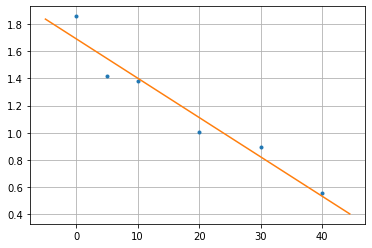

In [4]:
#Para a uma reta dos dados temos:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import solve

X = np.array([0., 5., 10., 20., 30., 40.])
Y = np.array([1.857, 1.419, 1.377, 1.002, 0.8975, 0.5529])

#cálculo dos valores a11, a12, a22, b1 e b2
a11 = np.sum(X**2)
a12 = np.sum(X)
a22 = len(X)

b1 = np.sum(X*Y)
b2 = np.sum(Y)

#Criação das matrizes para calcular a g(x)
A = np.array([[a11, a12], 
              [a12, a22]])
B = np.array([b1, b2])

a = solve(A,B)
print(a[0],"*x +", a[1])

#Definição da g(x)
g = lambda x: a[0]*x + a[1]

#Criação dos pontos na reta
Xr = np.arange(-5, 45, 0.5)

#Plota o gráfico
plt.plot(X, Y, ".", Xr, g(Xr), "-")
plt.grid()
plt.show()


0.00036277014366021057 *x^2 + -0.04338249781386626 *x + 1.7605304309806367


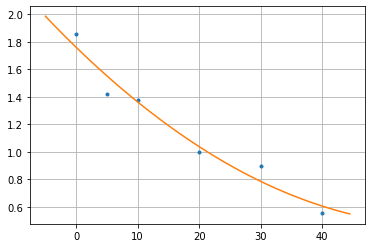

In [5]:
#Para o ajuste de uma parábola aos dados temos:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import solve

X = np.array([0., 5., 10., 20., 30., 40.])
Y = np.array([1.857, 1.419, 1.377, 1.002, 0.8975, 0.5529])

#cálculo dos valores a11, a12, a13, a23, a33, b1, b2 e b3
a11 = np.sum(X**4)
a12 = np.sum(X**3)
a13 = np.sum(X**2)
a23 = np.sum(X)
a33 = len(X)

b1 = np.sum((X**2)*Y)
b2 = np.sum(X*Y)
b3 = np.sum(Y)

#Criação das matrizes para calcular a g(x)
A = np.array([[a11, a12, a13], 
              [a12, a13, a23],
              [a13, a23, a33]])
B = np.array([b1, b2, b3])

a = solve(A,B)
print(a[0],"*x^2 +",a[1],"*x +", a[2])

#Definição da g(x)
g = lambda x: a[0]*(x**2) + a[1]*x + a[2]

#Criação dos pontos na reta
Xr = np.arange(-5, 45, 0.5)

#Plota o gráfico
plt.plot(X, Y, ".", Xr, g(Xr), "-")
plt.grid()
plt.show()

---
## Questão 4

Encontre a função do tipo $g(x) = a_{1}*x + a_{2}*$$\sin(x)$ que melhor se ajusta aos pontos tabelados dados

A função que melhor ajusta os dados é dada por:  0.2304544924850701 *x + 1.715560586388792 *sen(x)


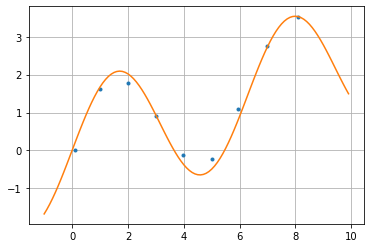

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.linalg import solve

X = np.array([0.1, 0.99, 2.02, 3.01, 3.97, 5.01, 5.93, 6.99, 8.08])
Y = np.array([0.000, 1.621, 1.782, 0.915, -0.122, -0.225, 1.093, 2.748, 3.534])

#define os valores para a11, a12, a22, b1 e b2
a11 = np.sum(X**2)

for i in range (len(X)):   
    a12 = np.sum(X[i] * math.sin(X[i]))
    
for i in range (len(X)):
    a22 = np.sum(math.sin(X[i])**2)

b1 = np.sum(Y*X)
for i in range (len(X)):
    b2 = np.sum(Y[i]*math.sin(X[i]))

#cria os vetores A e B de acordo com os valores obtidos de a11, a12, a22, b1 e b2
A = np.array([[a11, a12], 
             [a12, a22]])

B = np.array([b1, b2])

a = solve(A,B)
print("A função que melhor ajusta os dados é dada por: ",a[0],"*x +", a[1], "*sen(x)")

g = lambda x: a[0]*x + a[1]*np.sin(x)

Xr = np.arange(-1, 10, 0.1)

plt.plot(X, Y, ".", Xr, g(Xr), "-") 
plt.grid()
plt.show()

---
## Questão 5

a) Ajuste os dados às curvas $y = ab^{x}$ e $y = ax^{b}$: compare os valores obtidos por meio dessas equações com os dados experimentais.  
b)Avalie da melhor forma o valor de $y(x)$ para $x = 7$.

[0.35554547 3.47031451]


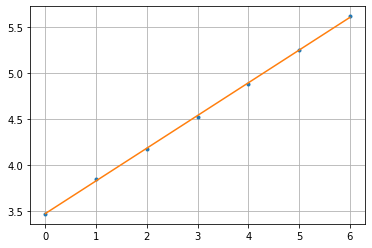

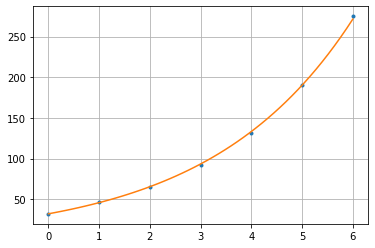

Valor de y(x) para x = 7: 387.274135664743


In [2]:
%matplotlib inline
import math
import numpy as np
from scipy.linalg import solve
import matplotlib.pyplot as plt

X = np.array([ 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0])
Y = np.array([ 32.0, 47.0, 65.0, 92.0, 132.0, 190.0, 275.0])

Yl = np.log(Y) 

# montando a matriz do sistema
a11 = np.sum(X * X)
a12 = np.sum(X)
a22 = len(X)
b1 = np.sum(X*Yl)
b2 = np.sum(Yl)

A = np.array([[a11,a12],[a12,a22]])
B = np.array([b1,b2])

a = solve(A, B)
print (a)

# lista de pontos para os plots
Xr = np.linspace(X[0], X[-1], 51)
#reta
h = lambda X: a[0]*X + a[1]
# plotando
plt.plot(X, Yl, ".", Xr, h(Xr), "-") 
plt.grid()
plt.show()
  
# hipérbole
k = math.exp(a[1])
b = math.exp(a[0])
g = lambda X: k*np.power(b,X)

Yr = g(Xr)
# plotando
plt.plot(X, Y, ".", Xr, g(Xr), "-") 
plt.grid()
plt.show()

print("Valor de y(x) para x = 7:",g(7))

Como nossa $h(x)$ é uma linearização da $g(x)$ inicial, logo a $g(x)$ se faz mais precisa ao procurarmos outros valores, como o valor de $y(x) = 7$ solicitado na alternativa $b)$ da questão. 